In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df=pd.read_csv('transaction_dataset.csv')

In [190]:
df.shape

(9841, 51)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [192]:
df.columns=df.columns.str.strip().str.replace(r'\b\s+\b','_',regex=True)

In [193]:
df.duplicated(subset='Index').sum()

np.int64(5112)

In [194]:
df['FLAG'].value_counts(normalize=True)

FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64

In [195]:
df[df.duplicated(subset='Index')]['FLAG'].value_counts(normalize=True)

FLAG
0    0.573748
1    0.426252
Name: proportion, dtype: float64

In [196]:
df.duplicated().sum()

np.int64(0)

In [197]:
df=df.drop(columns=['Unnamed: 0','Index','Address'])

In [198]:
categories=df.select_dtypes(include='object').columns

In [199]:
for i in df[categories].columns:
    print(f'The categorical column {i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missing values')

The categorical column ERC20_most_sent_token_type has 304 unique values and 2697 missing values
The categorical column ERC20_most_rec_token_type has 466 unique values and 871 missing values


In [200]:
numerics=df.select_dtypes(include='number').columns

In [201]:
#features wth numeric constant
constant_cols=df[numerics].var()[df[numerics].var()==0].index

In [202]:
constant_cols

Index(['ERC20_avg_time_between_sent_tnx', 'ERC20_avg_time_between_rec_tnx',
       'ERC20_avg_time_between_rec_2_tnx',
       'ERC20_avg_time_between_contract_tnx', 'ERC20_min_val_sent_contract',
       'ERC20_max_val_sent_contract', 'ERC20_avg_val_sent_contract'],
      dtype='object')

In [203]:
df.drop(constant_cols,axis=1,inplace=True)

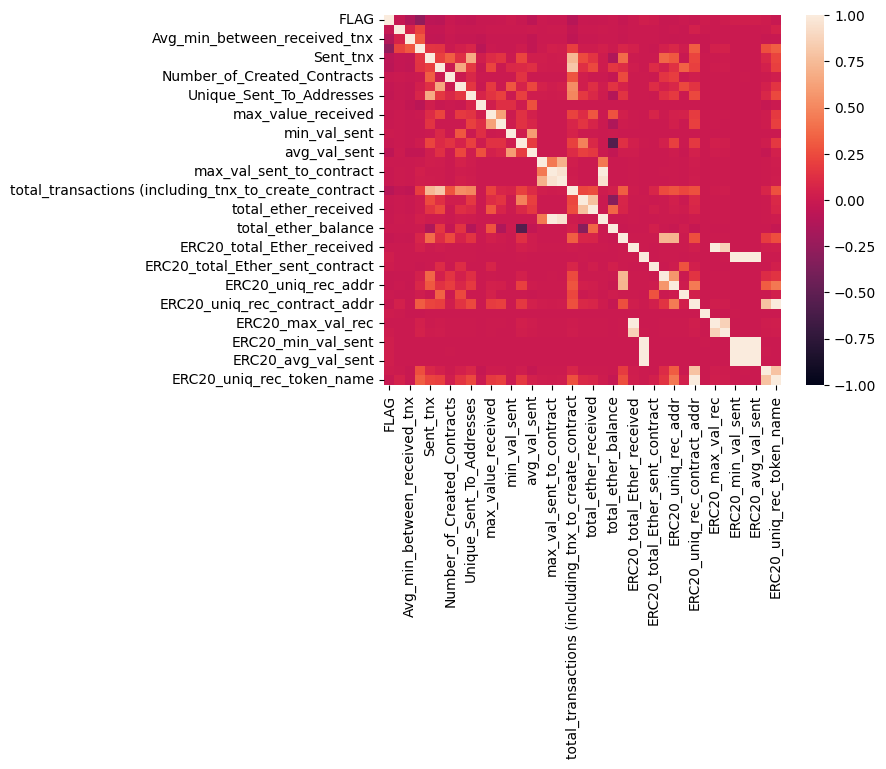

In [204]:
#correlation matrix
plt.figure(figure=(10,7))
numerics=df.select_dtypes(include='number').columns
corr=df[numerics].corr()
sns.heatmap(corr,annot=False,vmin=-1,vmax=1)
plt.show()

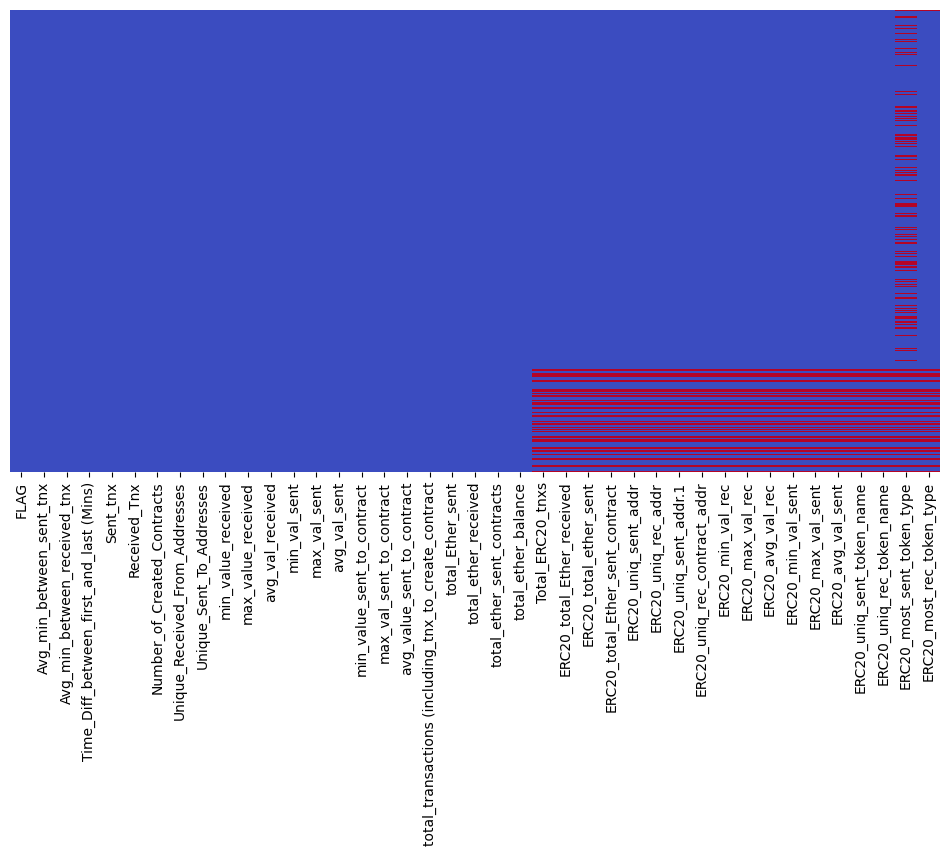

In [205]:
#missing value visulaization
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar=False)
plt.yticks([])
plt.show()

In [206]:
missing_rows_count=df.isnull().any(axis=1).sum()
print(missing_rows_count)

2720


In [207]:
missing_mask=df.isnull().any(axis=1)
print(df.loc[missing_mask,'FLAG'].value_counts())



FLAG
0    1891
1     829
Name: count, dtype: int64


In [208]:
df_sub=df[~missing_mask]

In [209]:
X=df_sub.drop('FLAG',axis=1)
y=df_sub['FLAG']
from sklearn.model_selection import train_test_split
X.head()

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
5,9900.12,375.48,20926.68,2,3,0,2,1,0.724148,4.813776,...,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0


In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
y_train.head()

6594    0
6907    0
2538    0
1415    0
178     0
Name: FLAG, dtype: int64

In [211]:
from category_encoders import TargetEncoder
encoder=TargetEncoder(cols=categories)
X_train_encoded=encoder.fit_transform(X_train,y_train)
print(X_train_encoded.shape)
X_test_encoded=encoder.transform(X_test)
train=pd.concat([X_train_encoded,y_train],axis=1)
test=pd.concat([X_test_encoded,y_test],axis=1)


(5696, 40)


In [212]:
from sklearn.ensemble import IsolationForest
print(X_train_encoded.head())
isolation_forest=IsolationForest(contamination='auto',random_state=123)
isolation_forest.fit(train)
anomaly_train_pred=isolation_forest.predict(train)
anomaly_test_pred=isolation_forest.predict(test)

      Avg_min_between_sent_tnx  Avg_min_between_received_tnx  \
6594                      2.72                          0.52   
6907                    107.23                          0.84   
2538                    155.89                          0.00   
1415                      0.71                      29707.33   
178                       1.56                          0.00   

      Time_Diff_between_first_and_last (Mins)  Sent_tnx  Received_Tnx  \
6594                                     9.18         3             2   
6907                                   323.38         3             2   
2538                                   311.78         2             1   
1415                                 59416.08         2             2   
178                                      4.68         3             2   

      Number_of_Created_Contracts  Unique_Received_From_Addresses  \
6594                            0                               2   
6907                            0     

In [213]:
in_train=np.sum(anomaly_train_pred==-1)
in_test=np.sum(anomaly_test_pred==-1)
print(in_train)
print(in_test)

196
55


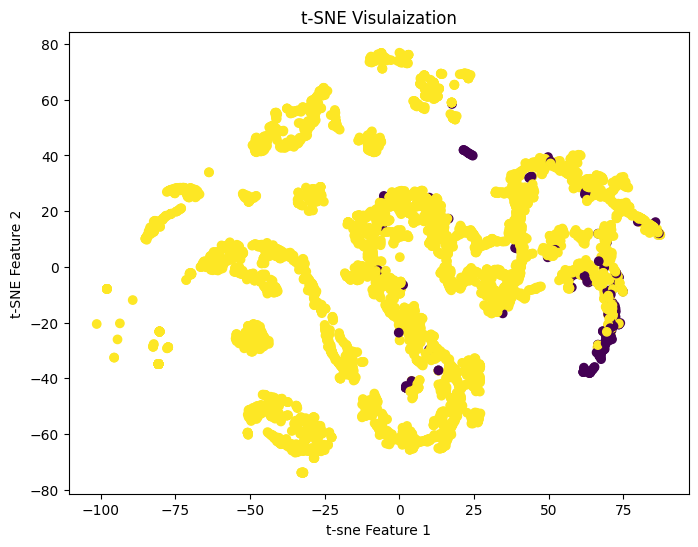

In [214]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=123)
X_train_tsne=tsne.fit_transform(X_train_encoded)
plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=anomaly_train_pred)
plt.title('t-SNE Visulaization')
plt.xlabel('t-sne Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

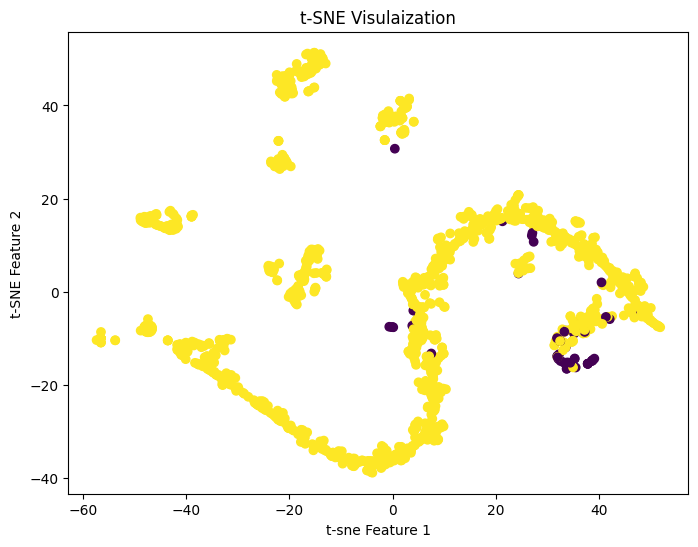

In [215]:
X_test_tsne=tsne.fit_transform(X_test_encoded)
plt.figure(figsize=(8,6))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=anomaly_test_pred)
plt.title('t-SNE Visulaization')
plt.xlabel('t-sne Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [222]:
import joblib
X_train = X_train_encoded.drop(columns=['FLAG'], errors='ignore')  
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(X_train)
joblib.dump(isolation_forest, "model.pkl")


['model.pkl']